In [6]:
import numpy as np
import pandas as pd
import pandas.io.date_converters as conv
import matplotlib.pyplot as plt
import seaborn as sns
import glob #used for reading multiple csvs

In [7]:
#read a sample csv
test = pd.read_csv('./data/flu_ground_truth/wILI_cleaned_Alabama.csv') 

In [8]:
#get paths for all csv
path = "./data/flu_ground_truth"
all_files = glob.glob(path + "/wILI_cleaned_*.csv")

#store each df in this list here
df_li = []

#store location name
areas = []

#parser when reading the dates
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%U')#year-week format

In [9]:
#build the list of dfs
for i in range(0, len(all_files)):
    temp_df = pd.read_csv(all_files[i], parse_dates=['time'], date_parser=dateparse)
    name = all_files[i][37: - 4]#gets all state / city names...simple slicing!
    name = name.replace(' ', '_')#replace space with underscore
    areas.append(name)
    new_temp_df = temp_df.rename(columns = {'time': name + '_time', 'wili': name + '_wili'})
    df_li.append(new_temp_df)

D:\Anaconda3\envs\cs109b\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


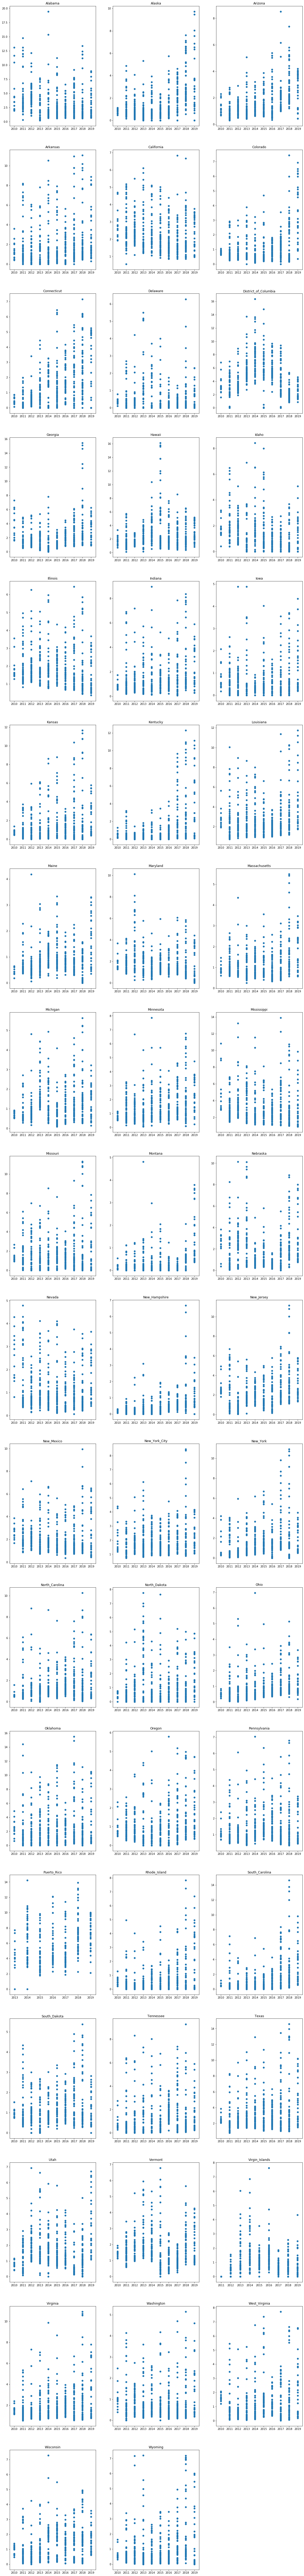

In [10]:
#let's draw a scatterplot

nrows = 20
ncols = 3
num = 0

plt.figure(figsize=(20,200))

while num < nrows * ncols and num < len(areas):
    num += 1
    plt.subplot(nrows, ncols, num)
    plt.scatter(x = df_li[num - 1][areas[num - 1] + '_time'], y = df_li[num - 1][areas[num - 1] + '_wili'])
    plt.title(areas[num - 1]);

## Yinjie

In [103]:
flu = pd.DataFrame()
for filename in all_files:
    name = filename[37: - 4]
    newdf = pd.read_csv(filename)
    newdf["area"]=name
    flu = flu.append(newdf)
flu.time = flu["time"].apply(lambda x: pd.to_datetime(x[:4], format='%Y') + pd.to_timedelta(str(int(x[5:])*7 )+ ' days'))

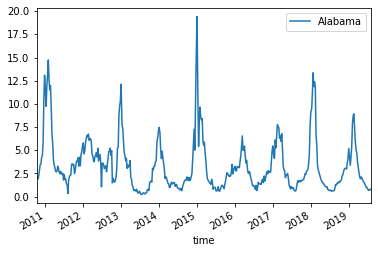

In [113]:
flu[flu.area==areas[0]].plot('time','wili',label=areas[0])

### COVID-19 CHINA

In [301]:
path = "./data/COVID-19-master/archived_data/archived_daily_case_updates"
all_covid_files = glob.glob(path + "/0*.csv")
covid = pd.DataFrame()
for filename in all_covid_files:
    df= pd.read_csv(filename)
    covid = covid.append(df)

In [302]:
covid = covid.rename(columns = {"Last Update":"time"})
covid.time = covid["time"].apply(lambda x: pd.to_datetime(x.split("/")[0]+"/"+x.split("/")[1]+"/2020", format='%m/%d/%Y') if x[1]=='/' else  pd.to_datetime(x[:10], format='%Y/%m/%d'))
covid.time = pd.to_datetime(covid.time,infer_datetime_format=True)
covid.reset_index(inplace=True,drop=True)
covid = covid.groupby(['time','Country/Region','Province/State'],as_index = False).max()

In [303]:
covid

,time,Country/Region,Province/State,Confirmed,ConfnSusp,Deaths,Recovered,Suspected
0,2020-01-21,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,117.0
1,2020-01-21,Mainland China,Anhui,NaN,NaN,NaN,NaN,3.0
2,2020-01-21,Mainland China,Beijing,10.0,NaN,NaN,NaN,NaN
3,2020-01-21,Mainland China,Chongqing,5.0,NaN,NaN,NaN,NaN
4,2020-01-21,Mainland China,Guangdong,17.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...
894,2020-02-14,Mainland China,Xinjiang,65.0,NaN,1.0,6.0,NaN
895,2020-02-14,Mainland China,Yunnan,162.0,NaN,0.0,36.0,NaN
896,2020-02-14,Mainland China,Zhejiang,1155.0,NaN,0.0,403.0,NaN
897,2020-02-14,Others,Diamond Princess cruise ship,218.0,NaN,0.0,0.0,NaN


In [304]:
covid_china=covid[covid["Country/Region"]=="Mainland China"]
chn_provs = list(covid_china["Province/State"].unique())

In [341]:
def plot_covid(frame,provs =chn_provs, column='Confirmed',nrows=5,ncols=7,fsize = (25,18),title=None):
    if title is None:
        title =column
    plt.figure(figsize=fsize)
    for i in range(len(provs)):
        row = i//ncols
        col = i-row*ncols
        ax = plt.subplot2grid((nrows,ncols), (row,col))
        df = frame[frame["Province/State"]==provs[i]]
        ax.plot(df["time"],df[column])
        # Only label every 20th value
        ticks_to_use = df.time.iloc[range(0,len(df.time),10)]

        # Set format of labels (note year not excluded as requested)
        labels = [ i.strftime("%m%d") for i in ticks_to_use ]

        # Now set the ticks and labels
        ax.set_xticks(ticks_to_use)
        ax.set_xticklabels(labels)
        ax.set_title(provs[i])
    plt.suptitle(title,fontsize=20)

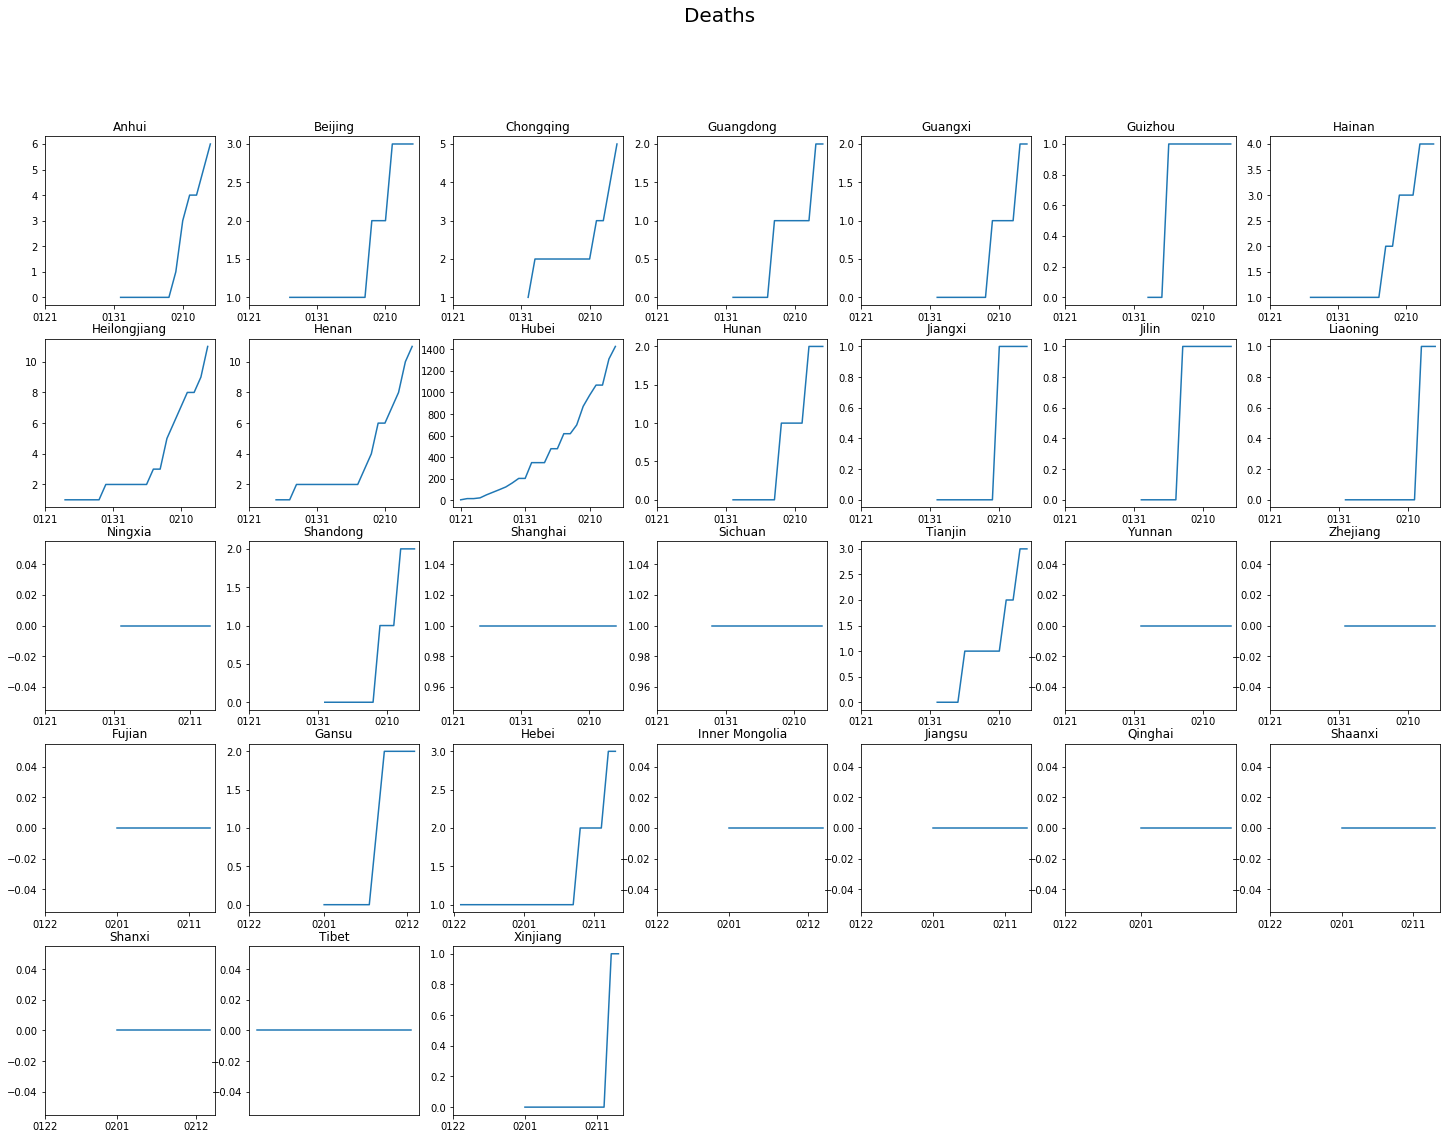

In [310]:
plot_covid(covid_china,chn_provs,'Deaths')

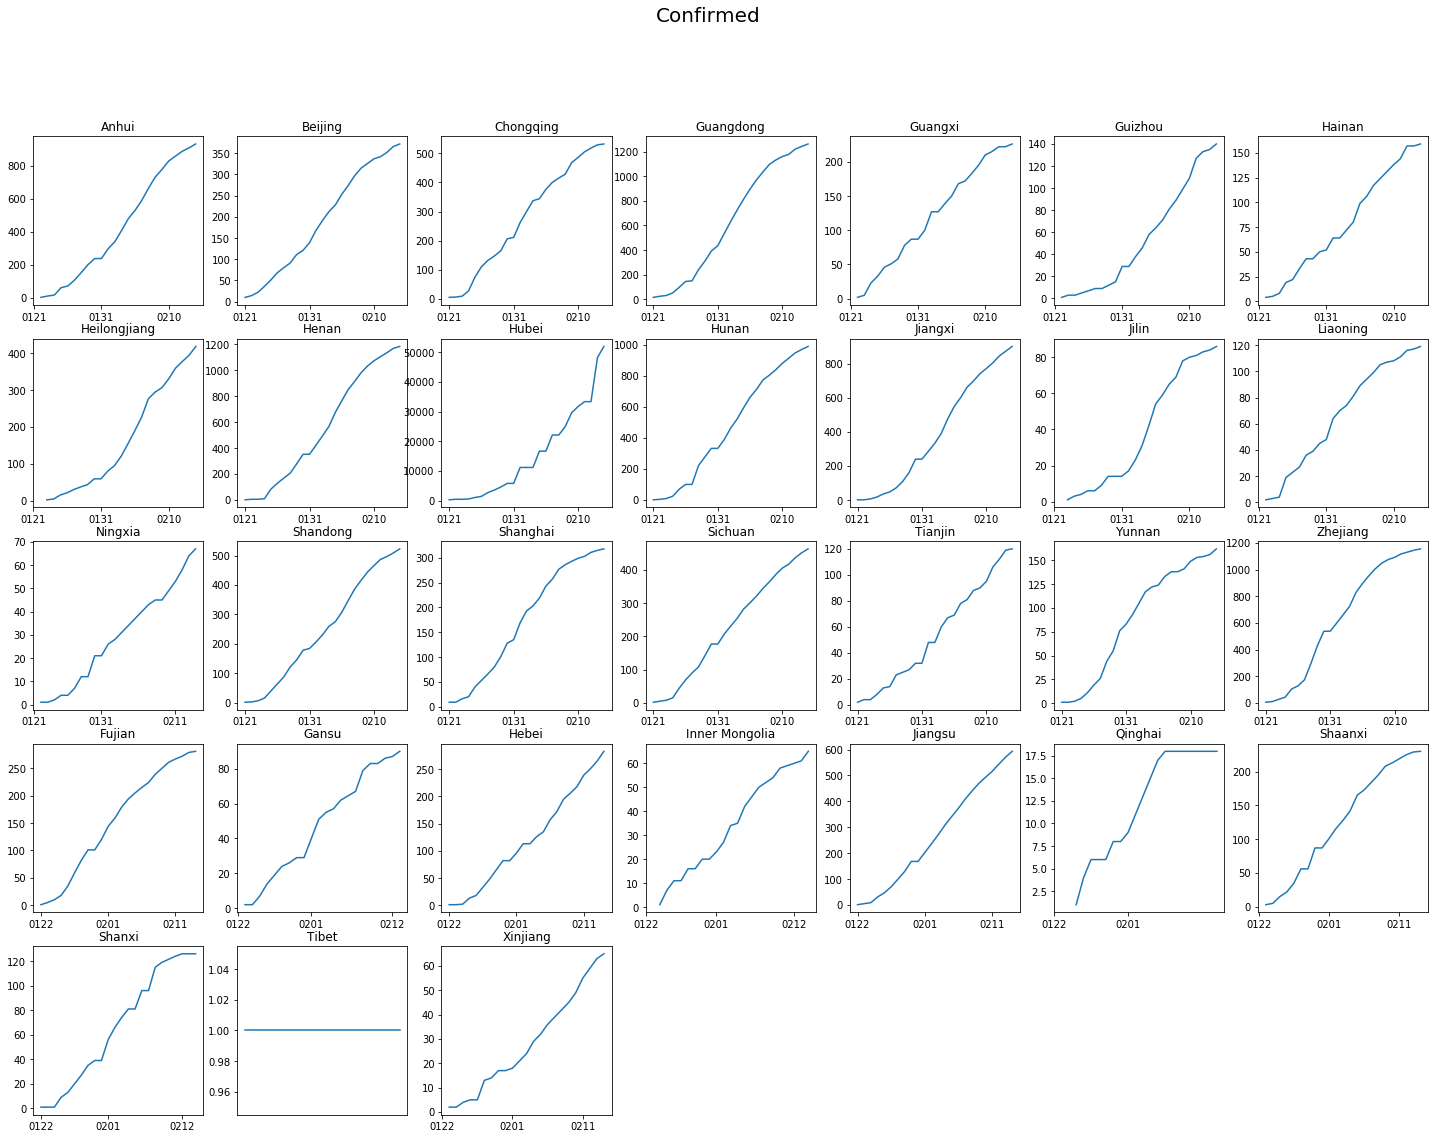

In [313]:
plot_covid(covid_china,chn_provs,'Confirmed')

### COVID global time series

In [334]:
path = "./data/COVID-19-master/archived_data/archived_time_series"
all_covid_files = glob.glob(path + "/time_series_19-covid*.csv")
covid_ts = pd.DataFrame()
for filename in all_covid_files:
    cat = (filename.split("\\")[-1])[21:-18]
    df= pd.read_csv(filename)
    df["category"]=cat
    covid_ts = covid_ts.append(df)
begin = list(covid_ts.columns).index("1/22/20")
renames = {name:'value'+str(i)for i,name in enumerate(covid_ts.columns[begin:-1])}
covid_ts=covid_ts.rename(columns = renames)
covid_ts.reset_index(inplace=True,drop=True)
covid_ts["id"] = covid_ts.index
covid_ts = pd.wide_to_long(covid_ts,['value'],i="id",j = "time")
covid_ts.reset_index(inplace=True)  
covid_ts["time"] =covid_ts["time"].apply(lambda x: pd.to_datetime("01222020", format='%m%d%Y') + pd.to_timedelta(str(x) + ' days') )
covid_ts = covid_ts.drop(["id"],axis=1)
covid_ts = covid_ts.groupby(['time','Country/Region','Province/State',"category"],as_index = False).max()

Confirmed
Deaths
Recovered


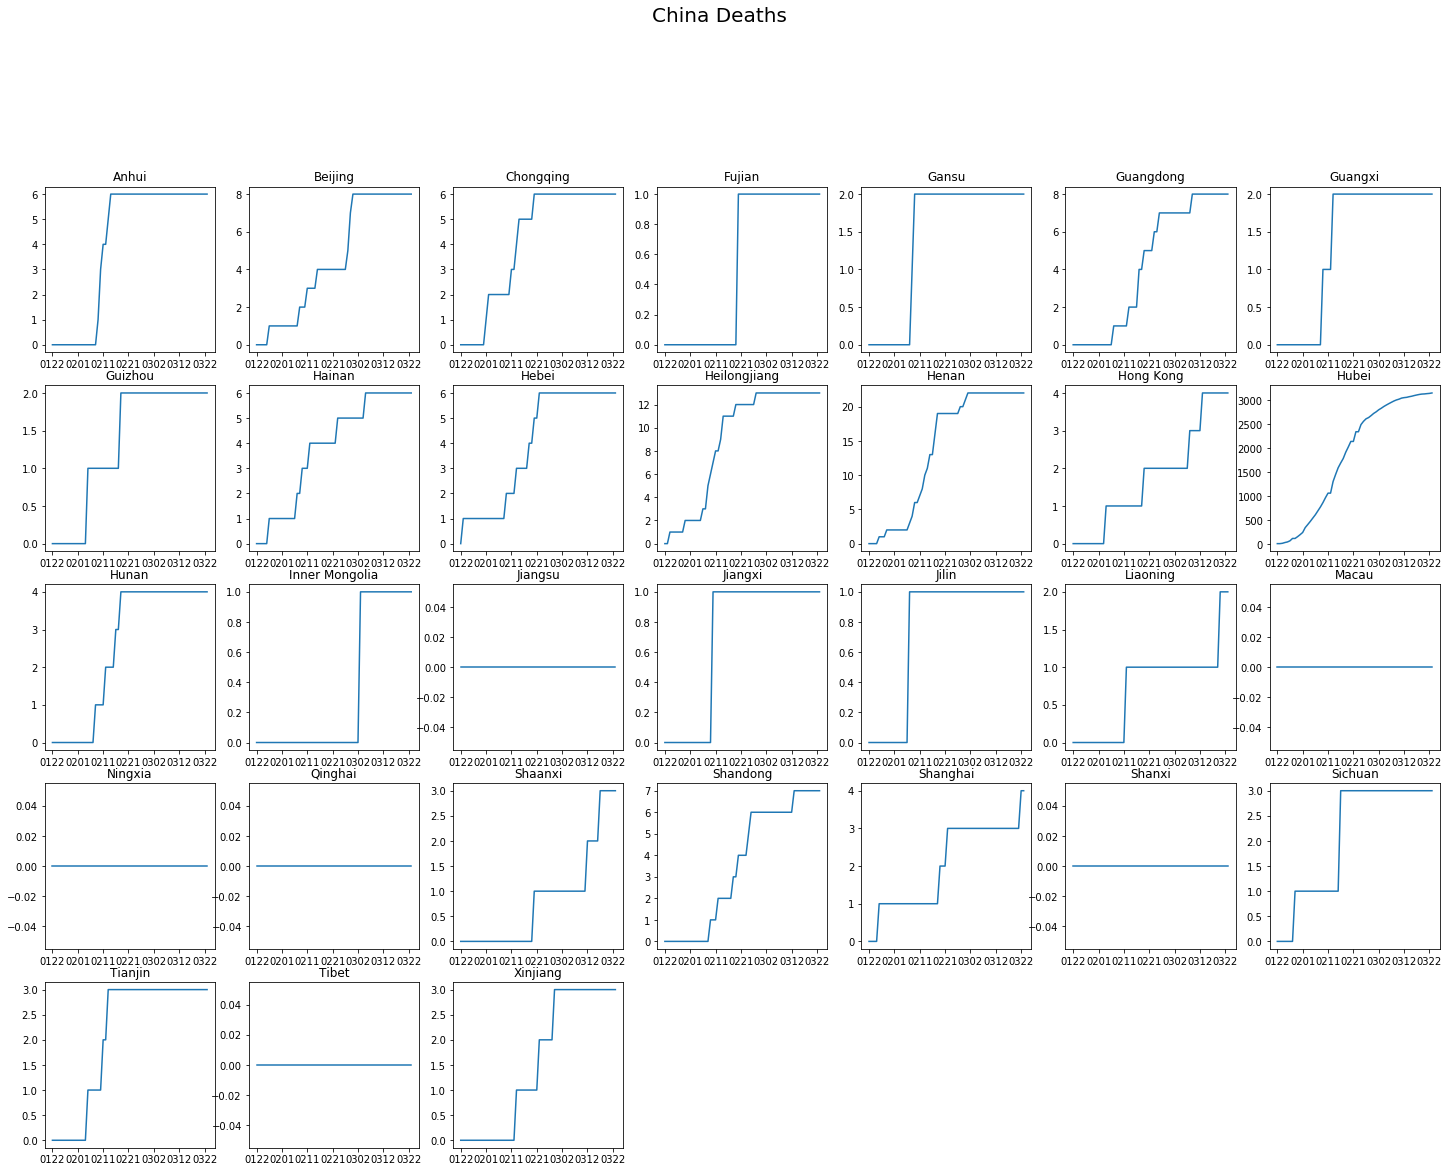

In [339]:
plot_covid(covid_ts[covid_ts.category=="Deaths"],list(covid_ts[covid_ts["Country/Region"]=="China"]["Province/State"].unique()),'value',7,7,(25,25),title="China Deaths")

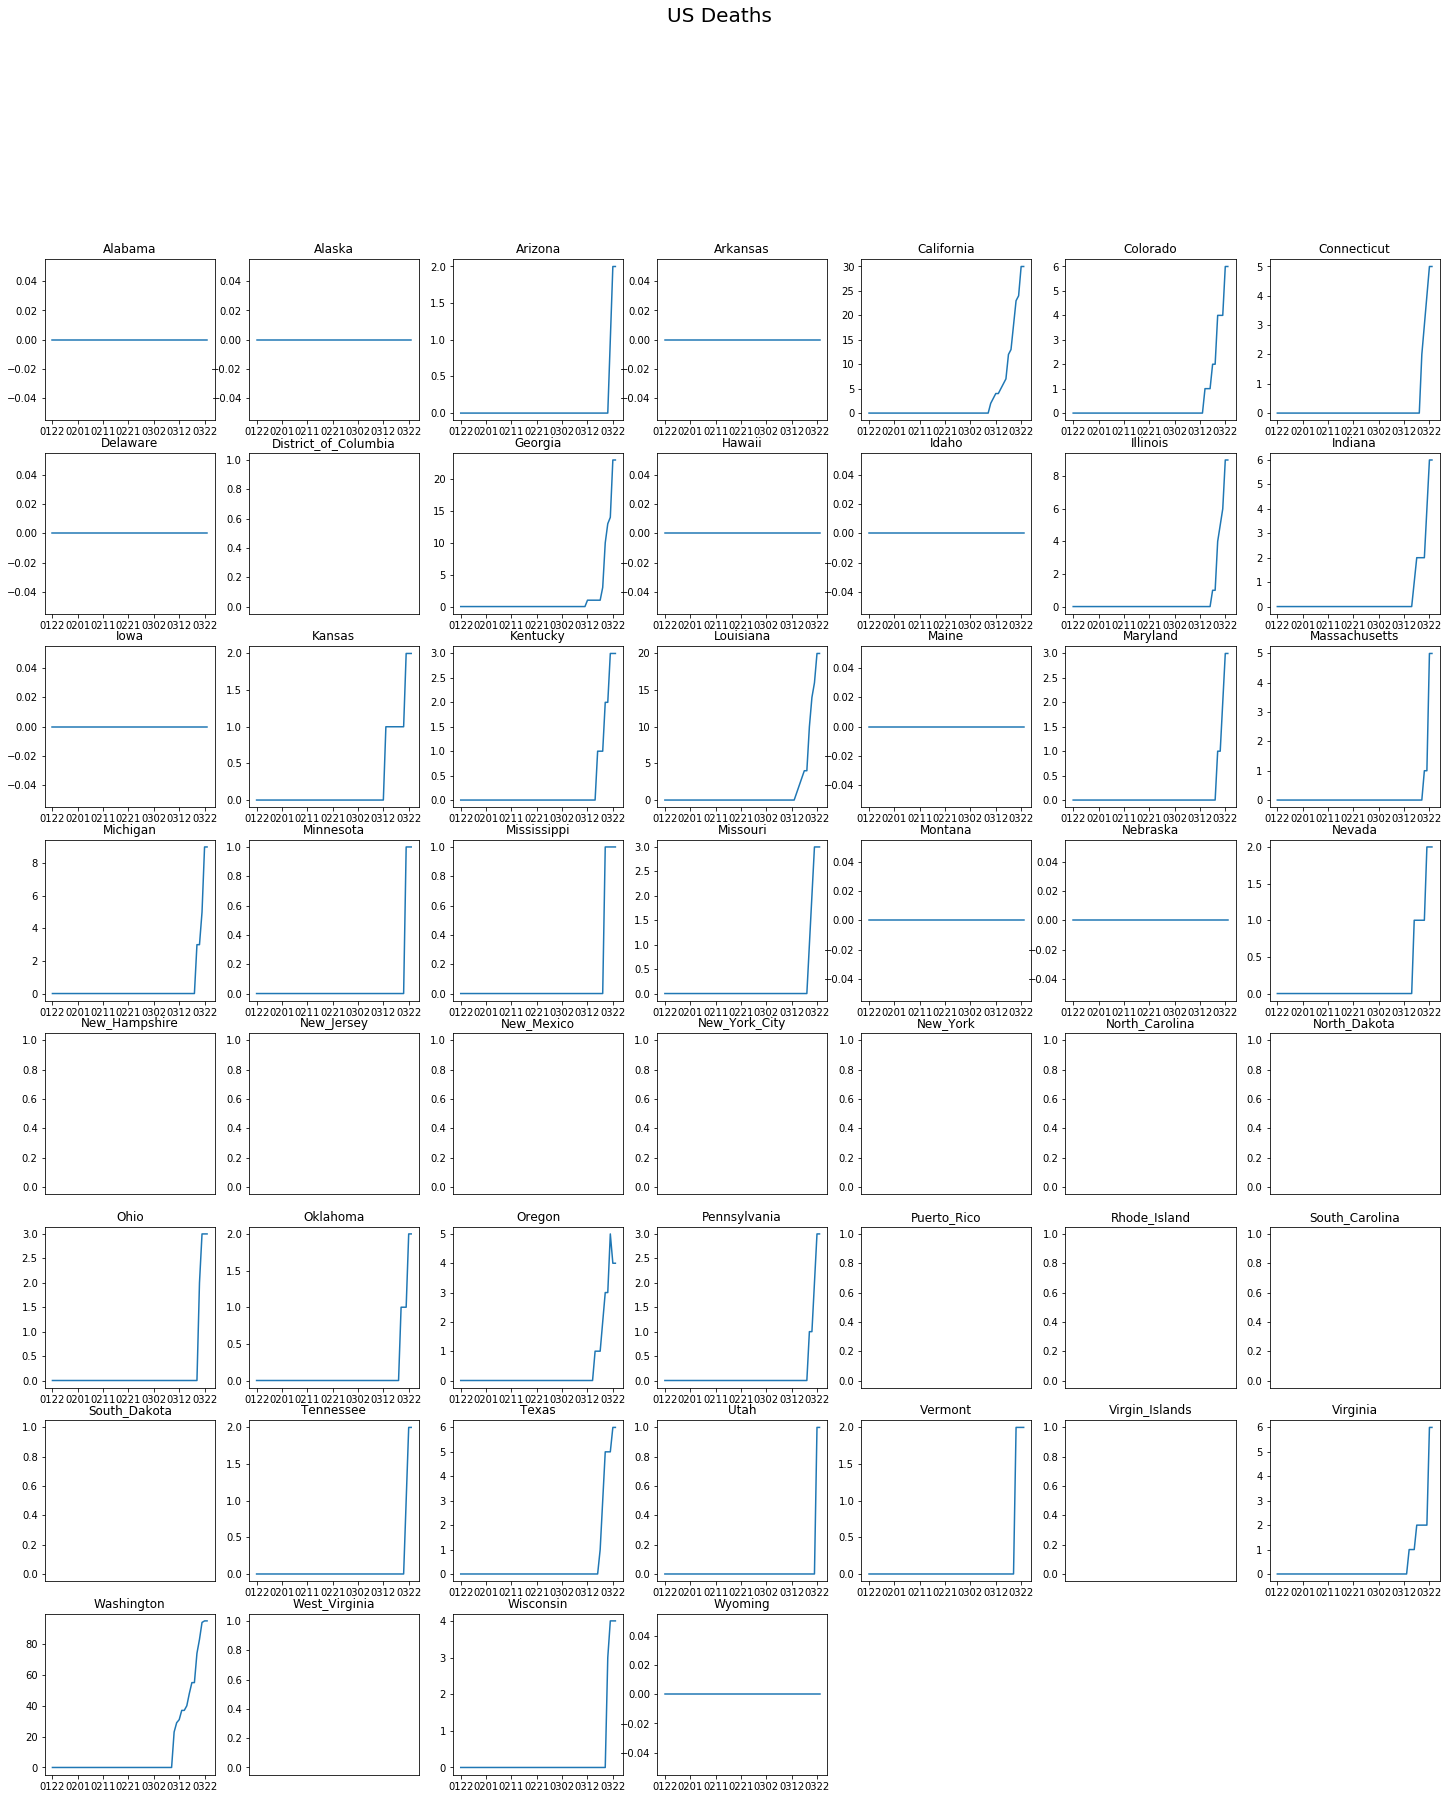

In [352]:
plot_covid(covid_ts[covid_ts.category=="Deaths"],areas,'value',10,7,(25,35),title="US Deaths")

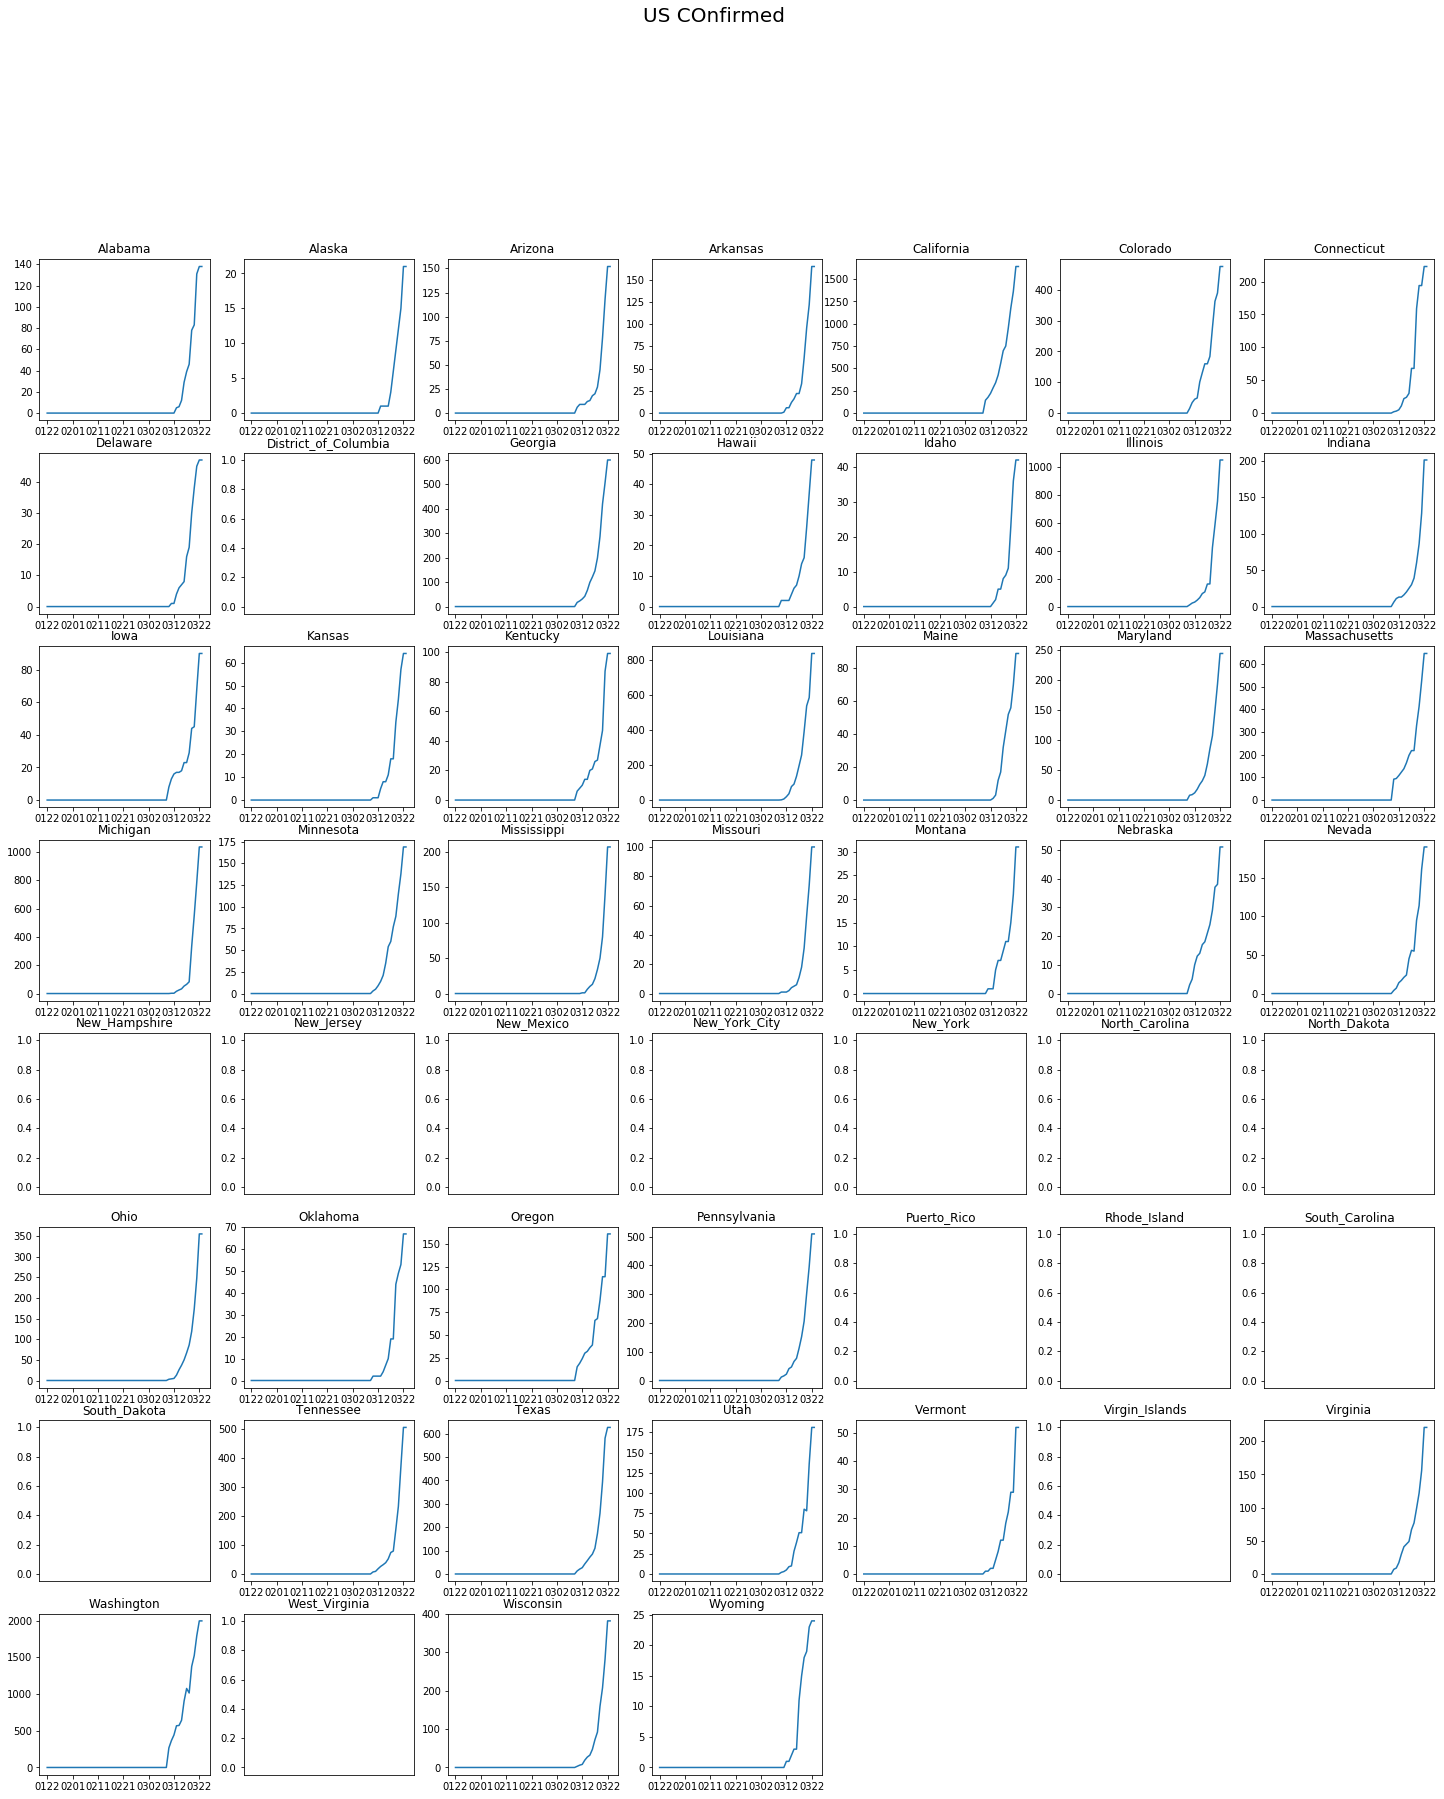

In [353]:
plot_covid(covid_ts[covid_ts.category=="Confirmed"],areas,'value',10,7,(25,35),title="US COnfirmed")

### COVID-19 daily report

In [362]:
path = "./data/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports"
all_covid_files = glob.glob(path + "/*.csv")
covid_dr = pd.DataFrame()
for filename in all_covid_files:
    date = (filename.split("\\")[-1]).split(".")[0]    
    df= pd.read_csv(filename)
    df["time"] = date
    covid.time = pd.to_datetime(covid.time,infer_datetime_format=True)
    covid_dr = covid_dr.append(df)
covid_dr = covid_dr.drop(["Last Update"],axis=1)
covid_dr = covid_dr.groupby(['time','Combined_Key'],as_index = False).max()

covid_dr

,time,Combined_Key,Active,Admin2,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,03-22-2020,"Abbeville, South Carolina, US",0.0,Abbeville,1.0,NaN,US,0.0,45001.0,3/22/20 23:45,34.223334,NaN,-82.461707,NaN,NaN,South Carolina,0.0
1,03-22-2020,"Acadia, Louisiana, US",0.0,Acadia,0.0,NaN,US,0.0,22001.0,3/22/20 23:45,30.295065,NaN,-92.414197,NaN,NaN,Louisiana,0.0
2,03-22-2020,"Accomack, Virginia, US",0.0,Accomack,1.0,NaN,US,0.0,51001.0,3/22/20 23:45,37.767072,NaN,-75.632346,NaN,NaN,Virginia,0.0
3,03-22-2020,"Ada, Idaho, US",0.0,Ada,11.0,NaN,US,0.0,16001.0,3/22/20 23:45,43.452658,NaN,-116.241552,NaN,NaN,Idaho,0.0
4,03-22-2020,"Adair, Iowa, US",0.0,Adair,1.0,NaN,US,0.0,19001.0,3/22/20 23:45,41.330756,NaN,-94.471059,NaN,NaN,Iowa,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49182,04-06-2020,Zambia,33.0,NaN,39.0,NaN,Zambia,1.0,NaN,2020-04-06 23:21:55,-13.133897,NaN,27.849332,NaN,NaN,NaN,5.0
49183,04-06-2020,"Zapata, Texas, US",0.0,Zapata,1.0,NaN,US,0.0,48505.0,2020-04-06 23:22:15,27.001564,NaN,-99.169872,NaN,NaN,Texas,0.0
49184,04-06-2020,"Zhejiang, China",33.0,NaN,1264.0,NaN,China,1.0,NaN,2020-04-06 02:17:23,29.183200,NaN,120.093400,NaN,NaN,Zhejiang,1230.0
49185,04-06-2020,Zimbabwe,9.0,NaN,10.0,NaN,Zimbabwe,1.0,NaN,2020-04-06 23:21:55,-19.015438,NaN,29.154857,NaN,NaN,NaN,0.0
